In [46]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
from torch.autograd import Variable
from sklearn.preprocessing import MinMaxScaler
import matplotlib.dates as mdates

## Data set

In [75]:
training_set1 = pd.read_csv('https://raw.githubusercontent.com/BettySanchez7/AirDataMx/main/datos/promedios_mensuales/PM10_mensual.csv')



## Dataloading

In [91]:
def sliding_windows(data, seq_length):
    x = []
    y = []

    for i in range(len(data)-seq_length-1):
        _x = data[i:(i+seq_length)]
        _y = data[i+seq_length]
        x.append(_x)
        y.append(_y)


    return np.array(x),np.array(y)



## Model

In [87]:
class LSTM(nn.Module):

    def __init__(self, num_classes, input_size, hidden_size, num_layers):
        super(LSTM, self).__init__()
        
        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.seq_length = seq_length
        
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=True)
        
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        h_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size))
        
        c_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size))
        
        # Propagate input through LSTM
        ula, (h_out, _) = self.lstm(x, (h_0, c_0))
        
        h_out = h_out.view(-1, self.hidden_size)
        
        out = self.fc(h_out)
        
        return out

BLUE: DATA TEST
ORANGE: DATA PREDICTION

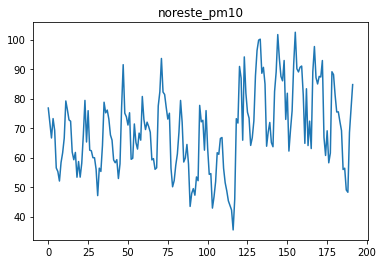

Epoch: 0, loss: 0.67786
Epoch: 100, loss: 0.02595
Epoch: 200, loss: 0.01763
Epoch: 300, loss: 0.01564
Epoch: 400, loss: 0.01522
Epoch: 500, loss: 0.01423
Epoch: 600, loss: 0.01317
Epoch: 700, loss: 0.01280
Epoch: 800, loss: 0.01253
Epoch: 900, loss: 0.01233
Epoch: 1000, loss: 0.01215
Epoch: 1100, loss: 0.01199
Epoch: 1200, loss: 0.01182
Epoch: 1300, loss: 0.01169
Epoch: 1400, loss: 0.01158
Epoch: 1500, loss: 0.01148
Epoch: 1600, loss: 0.01136
Epoch: 1700, loss: 0.01121
Epoch: 1800, loss: 0.01103
Epoch: 1900, loss: 0.01083


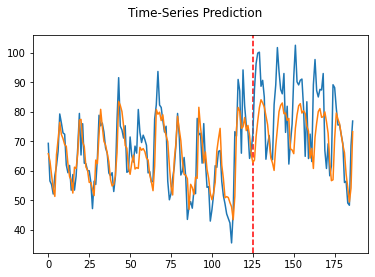

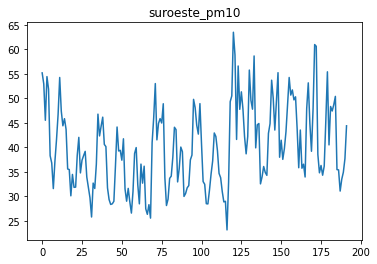

Epoch: 0, loss: 0.15072
Epoch: 100, loss: 0.03055
Epoch: 200, loss: 0.02020
Epoch: 300, loss: 0.01745
Epoch: 400, loss: 0.01700
Epoch: 500, loss: 0.01681
Epoch: 600, loss: 0.01650
Epoch: 700, loss: 0.01572
Epoch: 800, loss: 0.01535
Epoch: 900, loss: 0.01514
Epoch: 1000, loss: 0.01499
Epoch: 1100, loss: 0.01481
Epoch: 1200, loss: 0.01455
Epoch: 1300, loss: 0.01431
Epoch: 1400, loss: 0.01409
Epoch: 1500, loss: 0.01389
Epoch: 1600, loss: 0.01385
Epoch: 1700, loss: 0.01373
Epoch: 1800, loss: 0.01366
Epoch: 1900, loss: 0.01362


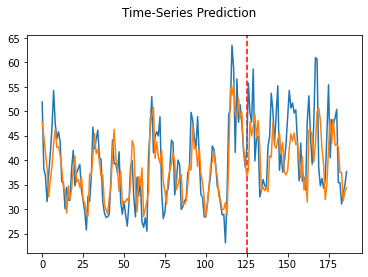

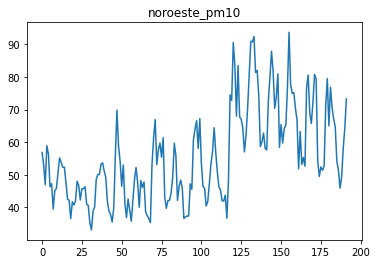

Epoch: 0, loss: 0.28732
Epoch: 100, loss: 0.02437
Epoch: 200, loss: 0.01940
Epoch: 300, loss: 0.01558
Epoch: 400, loss: 0.01405
Epoch: 500, loss: 0.01315
Epoch: 600, loss: 0.01170
Epoch: 700, loss: 0.01072
Epoch: 800, loss: 0.01046
Epoch: 900, loss: 0.01037
Epoch: 1000, loss: 0.01033
Epoch: 1100, loss: 0.01028
Epoch: 1200, loss: 0.01022
Epoch: 1300, loss: 0.01016
Epoch: 1400, loss: 0.01010
Epoch: 1500, loss: 0.01001
Epoch: 1600, loss: 0.00991
Epoch: 1700, loss: 0.00979
Epoch: 1800, loss: 0.00967
Epoch: 1900, loss: 0.00961


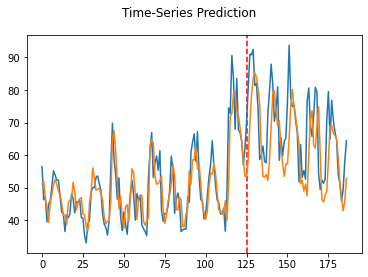

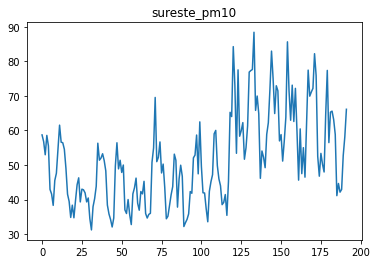

Epoch: 0, loss: 0.18946
Epoch: 100, loss: 0.02542
Epoch: 200, loss: 0.01848
Epoch: 300, loss: 0.01587
Epoch: 400, loss: 0.01518
Epoch: 500, loss: 0.01456
Epoch: 600, loss: 0.01383
Epoch: 700, loss: 0.01293
Epoch: 800, loss: 0.01209
Epoch: 900, loss: 0.01161
Epoch: 1000, loss: 0.01124
Epoch: 1100, loss: 0.01092
Epoch: 1200, loss: 0.01069
Epoch: 1300, loss: 0.01054
Epoch: 1400, loss: 0.01044
Epoch: 1500, loss: 0.01037
Epoch: 1600, loss: 0.01032
Epoch: 1700, loss: 0.01028
Epoch: 1800, loss: 0.01024
Epoch: 1900, loss: 0.01019


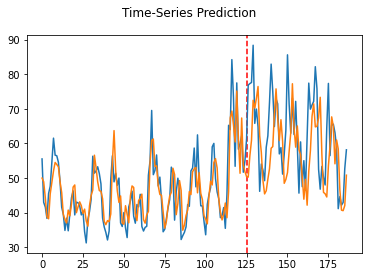

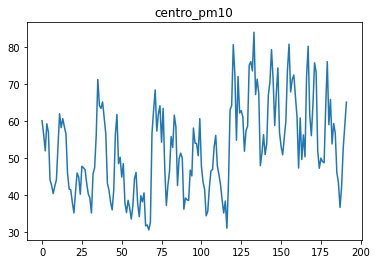

Epoch: 0, loss: 0.86128
Epoch: 100, loss: 0.02953
Epoch: 200, loss: 0.02346
Epoch: 300, loss: 0.01992
Epoch: 400, loss: 0.01834
Epoch: 500, loss: 0.01744
Epoch: 600, loss: 0.01706
Epoch: 700, loss: 0.01670
Epoch: 800, loss: 0.01569
Epoch: 900, loss: 0.01431
Epoch: 1000, loss: 0.01376
Epoch: 1100, loss: 0.01350
Epoch: 1200, loss: 0.01338
Epoch: 1300, loss: 0.01332
Epoch: 1400, loss: 0.01330
Epoch: 1500, loss: 0.01328
Epoch: 1600, loss: 0.01327
Epoch: 1700, loss: 0.01325
Epoch: 1800, loss: 0.01324
Epoch: 1900, loss: 0.01323


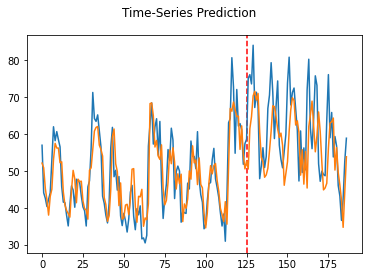

In [92]:

for i in range (1,6):
    training_set = training_set1.iloc[:,i:i+1].values
#Data Plot
    plt.plot(training_set, label = 'CO - Monoxido de carbono')
    plt.title(training_set1.columns[i])
    plt.show()
#training
    sc = MinMaxScaler()
    training_data = sc.fit_transform(training_set)

    seq_length = 4
    x, y = sliding_windows(training_data, seq_length)

    train_size = int(len(y) * 0.67)
    test_size = len(y) - train_size

    dataX = Variable(torch.Tensor(np.array(x)))
    dataY = Variable(torch.Tensor(np.array(y)))

    trainX = Variable(torch.Tensor(np.array(x[0:train_size])))
    trainY = Variable(torch.Tensor(np.array(y[0:train_size])))

    testX = Variable(torch.Tensor(np.array(x[train_size:len(x)])))
    testY = Variable(torch.Tensor(np.array(y[train_size:len(y)])))
    num_epochs = 2000
    learning_rate = 0.01

    input_size = 1
    hidden_size = 2
    num_layers = 1

    num_classes = 1

    lstm = LSTM(num_classes, input_size, hidden_size, num_layers)

    criterion = torch.nn.MSELoss()    # mean-squared error for regression
    optimizer = torch.optim.Adam(lstm.parameters(), lr=learning_rate)

    # Train the model

    for epoch in range(num_epochs):
        outputs = lstm(trainX)
        optimizer.zero_grad()
        
        # obtain the loss function
        loss = criterion(outputs, trainY)
        
        loss.backward()
        
        optimizer.step()
        if epoch % 100 == 0:
            print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))

#testing
    lstm.eval()
    train_predict = lstm(dataX)

    data_predict = train_predict.data.numpy()
    dataY_plot = dataY.data.numpy()

    data_predict = sc.inverse_transform(data_predict)
    dataY_plot = sc.inverse_transform(dataY_plot)

    plt.axvline(x=train_size, c='r', linestyle='--')

    plt.plot(dataY_plot)
    plt.plot(data_predict)
    plt.suptitle('Time-Series Prediction')
    plt.show()